Problema de interés: ¿Aumenta el rendimiento de millas por galon al aumentar la aceleración?
Hipótesis nula (H0): No hay diferencia en el rendimiento de mpg entre una aceleración mayor o menor.
Hipótesis alternativa (H1): Si existe diferencia en el rendimiento de mpg entre una aceleración mayor o menor.
Variable independiente: Aceleración
Variable dependiente: Millas por galón
Diseño del experimento: Se selecciona una muestra de datos de vehículos, se mide su aceleración y se registra sus millas por galón, y se comparan los grupos de aceleración alta y baja.
Promedio MPG (aceleración alta): 29.83
Promedio MPG (aceleración baja): 32.11
t-statistic: -3.63, p-value: 0.0005
Resultado: Se rechaza la hipótesis nula. Hay evidencia de que un cambio en la aceleración está asociado con una diferencia en el rendimiento de millas por galón.
Conclusión: El análisis sugiere que la aceleración tiene un efecto en las millas por galón, aunque siempre se debe considerar el tamaño de la muestra y otros f

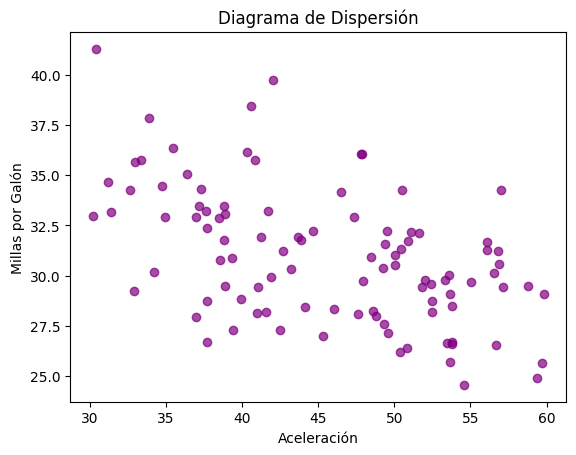

In [5]:
# Formulación de Hipótesis y Diseño de un Experimento
#
# Objetivo: Aprender a formular una hipótesis sobre un problema de interés y diseñar un experimento para probarla.
# Cada sección incluye explicación y ejemplo.

# 1. Identificar un Problema de Interés
# Ejemplo: ¿Aumenta el rendimiento de millas por galon al aumentar la aceleración?
problema = "¿Aumenta el rendimiento de millas por galon al aumentar la aceleración?"
print(f"Problema de interés: {problema}")

# 2. Formular una Hipótesis
# Hipótesis nula (H0): No hay diferencia en el rendimiento de mpg entre una aceleración mayor o menor.
# Hipótesis alternativa (H1): Si existe diferencia en el rendimiento de mpg entre una aceleración mayor o menor.
print("Hipótesis nula (H0): No hay diferencia en el rendimiento de mpg entre una aceleración mayor o menor.")
print("Hipótesis alternativa (H1): Si existe diferencia en el rendimiento de mpg entre una aceleración mayor o menor.")

# 3. Definir las Variables
# Variable independiente: Aceleración
# Variable dependiente: Millas por galon
print("Variable independiente: Aceleración")
print("Variable dependiente: Millas por galón")

# 4. Diseñar el Experimento
# - Seleccionar una muestra de datos de vehículos.
# - Medir cuánta aceleración registran.
# - Registrar sus millas por galón.
# - Se comparan los grupos de aceleración alta y baja.

print("Diseño del experimento: Se selecciona una muestra de datos de vehículos, se mide su aceleración y se registra sus millas por galón, y se comparan los grupos de aceleración alta y baja.")

# 5. Realizar el Análisis de Datos (Simulación)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
n = 100
n_group = n // 2 # 50 samples per group

# Definir las medias de aceleración para los dos grupos con una diferencia de 12
mean_low_acel = 40
mean_high_acel = mean_low_acel + 12 # 52
std_dev_acel = 5 # Desviación estándar para la aceleración dentro de cada grupo

# Generar datos de aceleración para cada grupo
aceleracion_low = np.random.normal(mean_low_acel, std_dev_acel, n_group)
aceleracion_high = np.random.normal(mean_high_acel, std_dev_acel, n_group)

# Simular la relación entre aceleración y MPG
# Asumimos que más aceleración (dentro de un rango) puede llevar a menos MPG
mpg_low = 40 - 0.2 * aceleracion_low + np.random.normal(0, 3, n_group)
mpg_high = 40 - 0.2 * aceleracion_high + np.random.normal(0, 3, n_group)

# Crear DataFrames para cada grupo y combinarlos
df_low = pd.DataFrame({'Aceleracion': aceleracion_low, 'MPG': mpg_low, 'Group': 'Baja Aceleración'})
df_high = pd.DataFrame({'Aceleracion': aceleracion_high, 'MPG': mpg_high, 'Group': 'Alta Aceleración'})
df = pd.concat([df_low, df_high]).reset_index(drop=True)

# Comparar promedios de ambos grupos (alta y baja aceleración)
grupo_alta_aceleracion = df[df['Group'] == 'Alta Aceleración']['MPG']
grupo_baja_aceleracion = df[df['Group'] == 'Baja Aceleración']['MPG']

print(f"Promedio MPG (aceleración alta): {grupo_alta_aceleracion.mean():.2f}")
print(f"Promedio MPG (aceleración baja): {grupo_baja_aceleracion.mean():.2f}")

# Prueba estadística: t-test para diferencia de medias
from scipy.stats import ttest_ind
stat, p = ttest_ind(grupo_alta_aceleracion, grupo_baja_aceleracion, equal_var=False)
print(f"t-statistic: {stat:.2f}, p-value: {p:.4f}")

# 6. Interpretar los Resultados
if p < 0.05:
    print("Resultado: Se rechaza la hipótesis nula. Hay evidencia de que un cambio en la aceleración está asociado con una diferencia en el rendimiento de millas por galón.")
else:
    print("Resultado: No se rechaza la hipótesis nula. No hay evidencia suficiente de diferencia.")

# 7. Concluir y Comunicar los Hallazgos
print("Conclusión: El análisis sugiere que la aceleración tiene un efecto en las millas por galón, aunque siempre se debe considerar el tamaño de la muestra y otros factores externos.")

plt.figure()
plt.scatter(df['Aceleracion'], df['MPG'], color='purple', alpha=0.7)
plt.title('Diagrama de Dispersión')
plt.xlabel('Aceleración')
plt.ylabel('Millas por Galón')
plt.show()